In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
in_file = pd.read_csv("/home/amorelli/r_estimate/B_maps_white_noise/results_6b_5_23/log",delim_whitespace=True, index_col=0) 

In [3]:
keys=list(in_file.columns)# i get the name of the columns
index_lr=keys.index("lr") #in the log i have the loss then lr then all the metrics evaluated on training set then all the metrics
#evaluated on validation
keys.pop(index_lr) #i remove lr label
dim=len(keys)
half_dim=int(dim/2)
loss_metrics=keys[:half_dim] #the labels of the metrics evaluated on the training set are the first half 
val_metrics=keys[half_dim:] #the labels of the metrics evaluated on the validation set are the second half

In [4]:
print("metrics (evaluated on training set and validation set) on 1st epoch vs metrics (..) on last epoch")
for key_loss,key_val in zip(loss_metrics,val_metrics):
    print(key_loss," epoch 0:",in_file[key_loss][0],"\t","last epoch:",in_file[key_loss][len(in_file)-1])
    print(key_val," epoch 0:",in_file[key_val][0],"\t","last epoch:",in_file[key_val][len(in_file)-1])
    print("\n")

metrics (evaluated on training set and validation set) on 1st epoch vs metrics (..) on last epoch
loss  epoch 0: 0.1005272567272186 	 last epoch: 0.0053257658146321
val_loss  epoch 0: 0.0520154349505901 	 last epoch: 0.0051643718034029


mse_sigma  epoch 0: 0.058133065700531 	 last epoch: 0.0052115935832262
val_mse_sigma  epoch 0: 0.0557006485760211 	 last epoch: 0.0050834137946367


mse_tau  epoch 0: 0.0749683082103729 	 last epoch: 0.0052498509176075
val_mse_tau  epoch 0: 0.0494084693491458 	 last epoch: 0.0044884802773594


sigma_batch_loss  epoch 0: 0.1005272567272186 	 last epoch: 0.0053257658146321
val_sigma_batch_loss  epoch 0: 0.0508850738406181 	 last epoch: 0.0050536855123937


sigma_f_loss  epoch 0: 5813.3818359375 	 last epoch: 521.164794921875
val_sigma_f_loss  epoch 0: 5570.1142578125 	 last epoch: 508.3458557128906


sigma_loss  epoch 0: 0.1331014037132263 	 last epoch: 0.0104614468291401
val_sigma_loss  epoch 0: 0.1051091104745864 	 last epoch: 0.0095718931406736




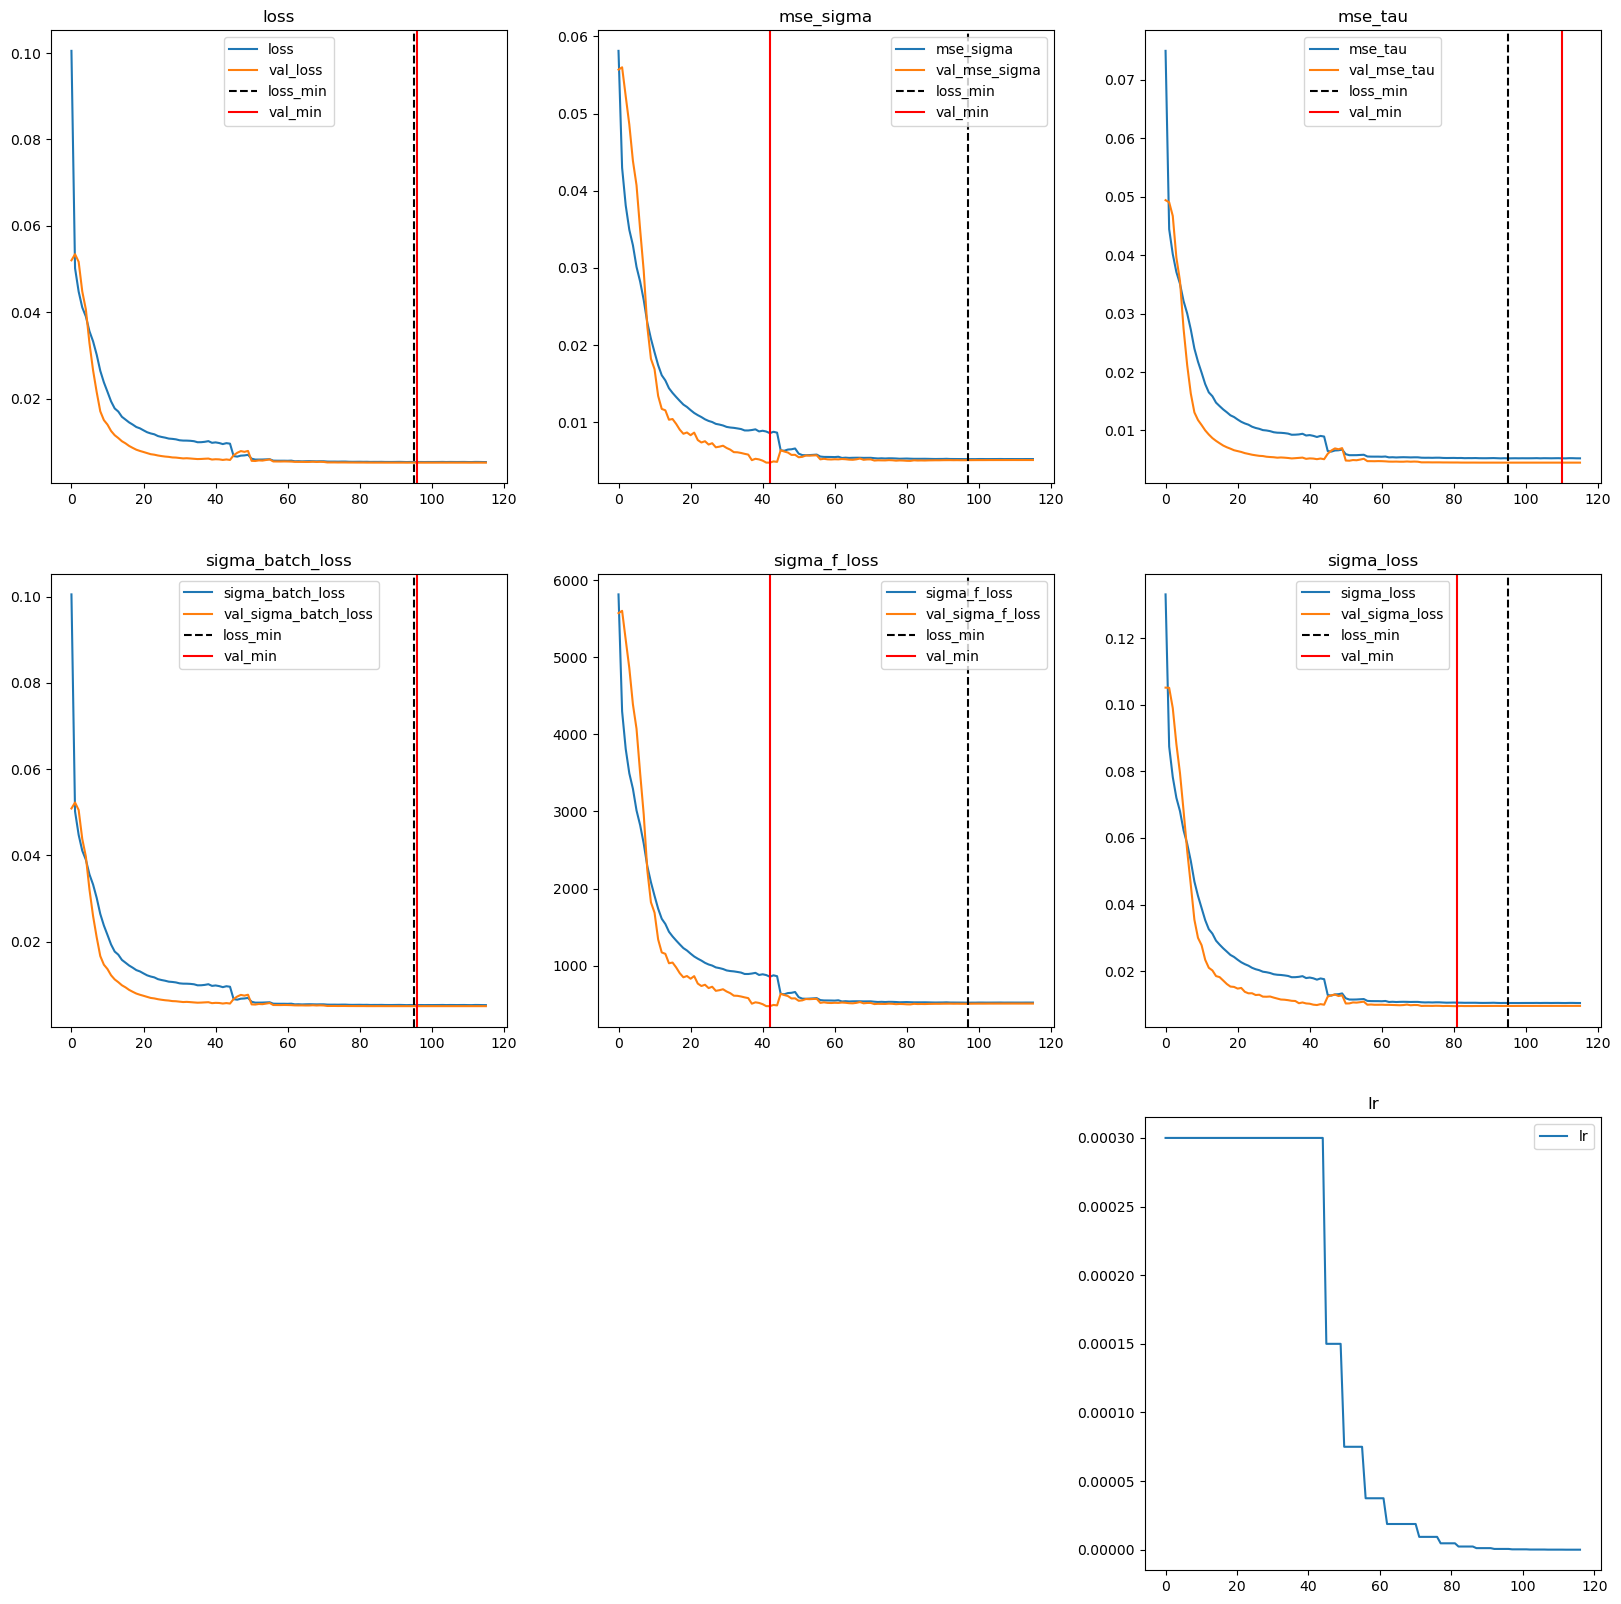

In [5]:
fig = plt.figure(figsize=(20,20))
epochs=in_file.index 
dim_fig=10
for i in range(1,half_dim): # i find the smallest i such that i^2 > number of metrics to plot
    if i*i>=half_dim+1:
        dim_fig=i
        break
st=0
end=-1
for i in range(half_dim):
    plt.subplot(dim_fig,dim_fig,i+1)
    plt.plot(epochs[st:end],in_file[loss_metrics[i]][st:end],label=loss_metrics[i])
    plt.plot(epochs[st:end],in_file[val_metrics[i]][st:end],label=val_metrics[i])
    plt.axvline(in_file[loss_metrics[i]].idxmin(), color="black", linestyle="--", label="loss_min")
    plt.axvline(in_file[val_metrics[i]].idxmin(), color="red", linestyle="-", label="val_min")
    plt.title(loss_metrics[i])
    plt.legend()
plt.subplot(dim_fig,dim_fig,int(dim_fig**2))
plt.plot(epochs,in_file["lr"],label="lr")
plt.title("lr")
plt.legend()